# Problem statement :  **SHAP - Shapley Additive Explanations** in ML

# Diabetes affects people manifesting as insulin defenciency (produced by pancreas)

# The work shown is related to type ii diabetes, where the body cells respond poorly or do not absorb enough sugar.

# **Dataset Has 1000 Rows and 14 Columns**

# https://data.mendeley.com/datasets/wj9rwkp9c2/1


# Importing dataset

In [114]:
!wget https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded

--2023-10-05 06:35:46--  https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd [following]
--2023-10-05 06:35:47--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.218.0.200, 52.92.32.194, 3.5.72.41, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.218.0.200|:443...

# Installing required dependencies

In [115]:
!pip install shap

# Importing required libraries

In [116]:
!pip install --upgrade xgboost
#!pip install xgboost==1.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.0
    Uninstalling xgboost-1.7.0:
      Successfully uninstalled xgboost-1.7.0


In [117]:
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Reading dataset

In [119]:
df = pd.read_csv("/content/file_downloaded")

In [120]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Inspecting the dataframe

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [122]:
df['ID'].nunique()

800

In [123]:
df['CLASS'].nunique() # Y - Yes, N - No, P - Prediabetic

5

In [124]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [125]:
df['CLASS'] = df['CLASS'].str.replace(' ','') # Data cleaning

In [126]:
df['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [127]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [128]:
df['Gender'] = df['Gender'].apply(str.upper) # Data preprocessing

In [129]:
df['Gender'].value_counts()

M    565
F    435
Name: Gender, dtype: int64

<Axes: >

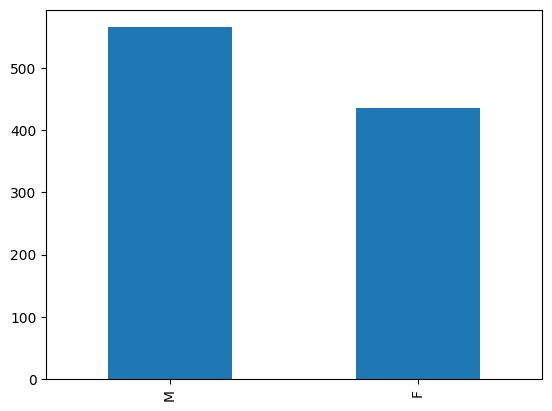

In [130]:
df['Gender'].value_counts().plot(kind = "bar")

In [131]:
df['AGE'].nunique()

50

# Creation of age grouping

In [132]:
age_range_buckets = ["[{0} - {1}]".format(age, age + 10) for age in range(20, 100, 10)]

In [133]:
age_range_buckets

['[20 - 30]',
 '[30 - 40]',
 '[40 - 50]',
 '[50 - 60]',
 '[60 - 70]',
 '[70 - 80]',
 '[80 - 90]',
 '[90 - 100]']

In [134]:
df['age_range'] = pd.cut(x = df['AGE'], bins = 8, labels = age_range_buckets)

In [135]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70]
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30]
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70]
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70]
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40]


In [136]:
df['age_range'].value_counts()

[60 - 70]     476
[70 - 80]     274
[50 - 60]      79
[40 - 50]      58
[30 - 40]      54
[80 - 90]      36
[90 - 100]     19
[20 - 30]       4
Name: age_range, dtype: int64

In [137]:
correlation_values = df.corr()
correlation_values


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322


<Axes: >

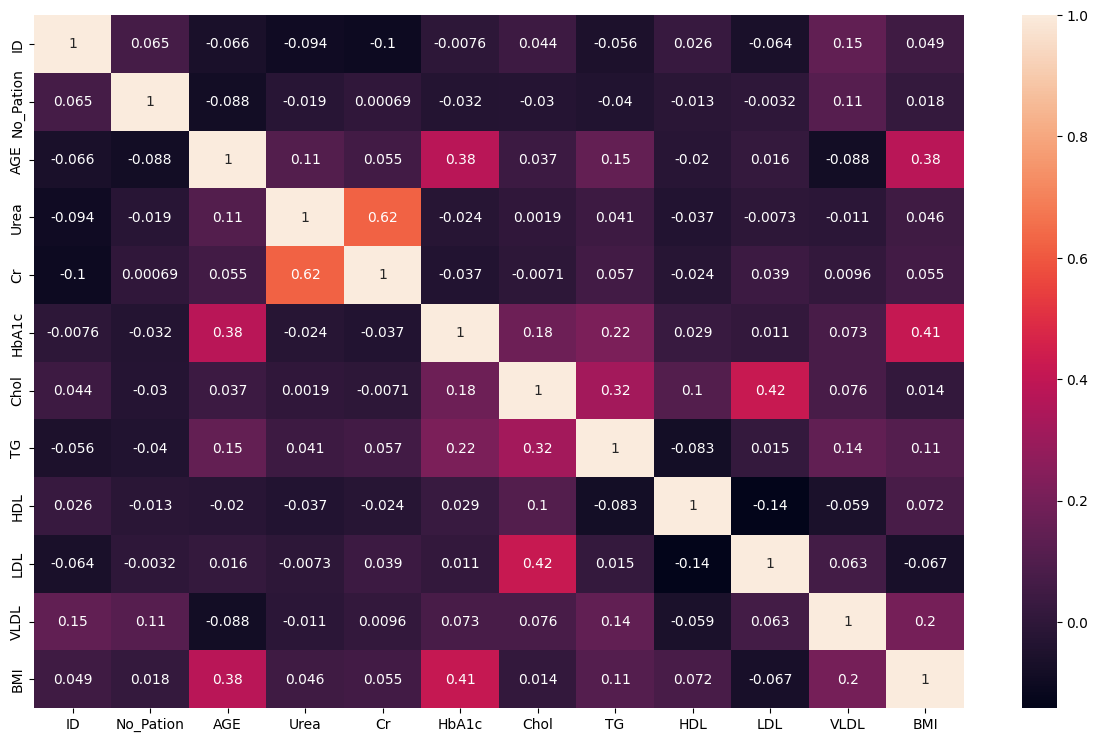

In [138]:
plt.figure(figsize = (15, 9))
sns.heatmap(correlation_values, annot = True)

In [164]:
df2 = df.drop(['ID', 'No_Pation', 'AGE'], axis = 1)
df2.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70]
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30]
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70]
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70]
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40]


#Encoding Gender, Class and Age_Range Columns

In [140]:
le1 = LabelEncoder()
df2['Gender'] =le1.fit_transform(df2['Gender'])
le2 = LabelEncoder()
df2['CLASS'] =le2.fit_transform(df2['CLASS'])
le3 = LabelEncoder()
df2['age_range'] =le3.fit_transform(df2['age_range'])

In [141]:
le1.classes_

array(['F', 'M'], dtype=object)

In [142]:
le2.classes_

array(['N', 'P', 'Y'], dtype=object)

In [143]:
le3.classes_

array(['[20 - 30]', '[30 - 40]', '[40 - 50]', '[50 - 60]', '[60 - 70]',
       '[70 - 80]', '[80 - 90]', '[90 - 100]'], dtype=object)

In [144]:
df2.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,0
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0,4
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1


# MinMaxScaler()

In [145]:
scaler = MinMaxScaler()


In [146]:
columns_to_scale = ['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
columns_scaled = ['Urea_scaled', 'Cr_scaled', 'HbA1c_scaled', 'Chol_scaled', 'TG_scaled', 'HDL_scaled', 'LDL_scaled', 'VLDL_scaled', 'BMI_scaled']
scale_values = df2[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
df2_scaled = pd.DataFrame(scaled_array, columns = columns_scaled)
df2_scaled.head()

,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565


In [147]:
df3 = pd.concat([df2, df2_scaled], axis = 1)
df3.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,...,age_range,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,1,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,...,0,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,...,4,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,1,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,...,1,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565


In [148]:
X = df3[['Gender', 'age_range', 'Urea_scaled', 'Cr_scaled', 'HbA1c_scaled', 'Chol_scaled', 'TG_scaled', 'HDL_scaled', 'LDL_scaled', 'VLDL_scaled', 'BMI_scaled']].values
y = df3['CLASS'].values
train_set, test_set, train_label, test_label = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [149]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [150]:
X[0]

array([0.        , 4.        , 0.109375  , 0.05037783, 0.26490066,
       0.40776699, 0.04444444, 0.22680412, 0.11458333, 0.01146132,
       0.17391304])

In [151]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('XGB', XGBClassifier(objective = "multi:softprob", num_class = 3)))


In [152]:
import numpy as np
print(np.unique(train_label))

[0 1 2]


In [153]:
print(np.unique(test_label))

[0 1 2]


In [154]:
XGBClassifier_model = XGBClassifier()

In [155]:
XGBClassifier_model_fitted = XGBClassifier_model.fit(train_set, train_label)

In [156]:
XGBClassifier_model_prediction = XGBClassifier_model.predict(test_set)

In [157]:
df3['CLASS'].unique() # 0 - no diabetes, 1 - prediabetes, 2- diabetic

array([0, 1, 2])

In [158]:
print('XGB Classifier Accuracy Score: \n ', accuracy_score(test_label, XGBClassifier_model_prediction))

XGB Classifier Accuracy Score: 
  0.995


In [159]:
print('XGB Classifier Report \n', classification_report(test_label, XGBClassifier_model_prediction, target_names = ['0', '1', '2']))

XGB Classifier Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      1.00       176

    accuracy                           0.99       200
   macro avg       1.00      0.96      0.98       200
weighted avg       1.00      0.99      0.99       200



In [160]:
XGBClassifier_matrix = confusion_matrix(test_label, XGBClassifier_model_prediction)

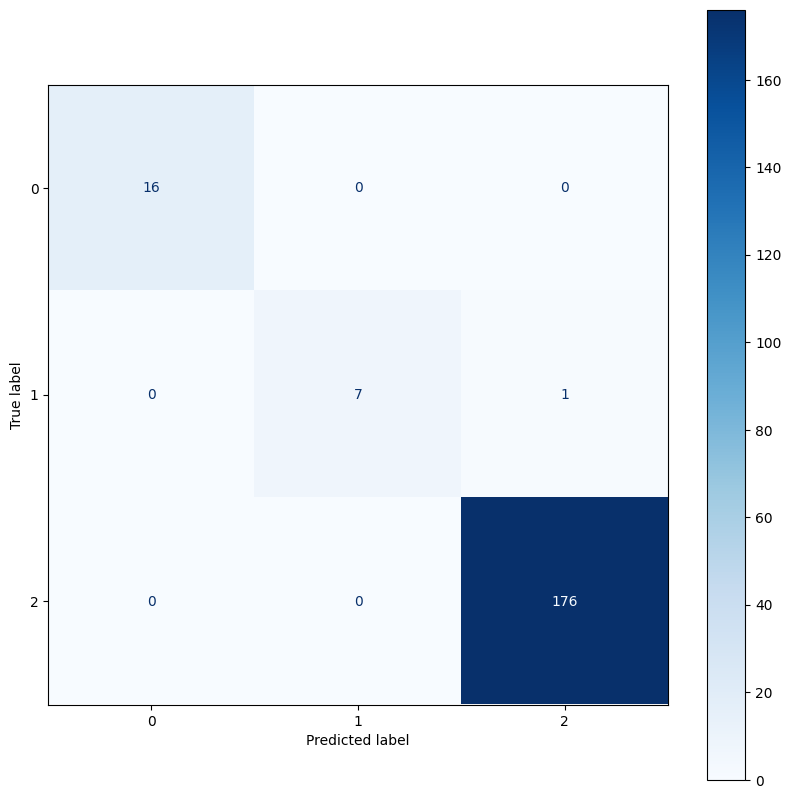

In [161]:
XGBClassifier_confusion_matrix = ConfusionMatrixDisplay(XGBClassifier_matrix)
fig, ax = plt.subplots(figsize = (10, 10))
XGBClassifier_confusion_matrix.plot(cmap= plt.cm.Blues, ax = ax)

# Model explanation with SHAP (shapeley additive explanations)

Shap attempts to quantify the feature contribution towards model prediction.

The top contributors towards model prediction are Features 4 (HPA1c) and Feature 10 (BMI) .

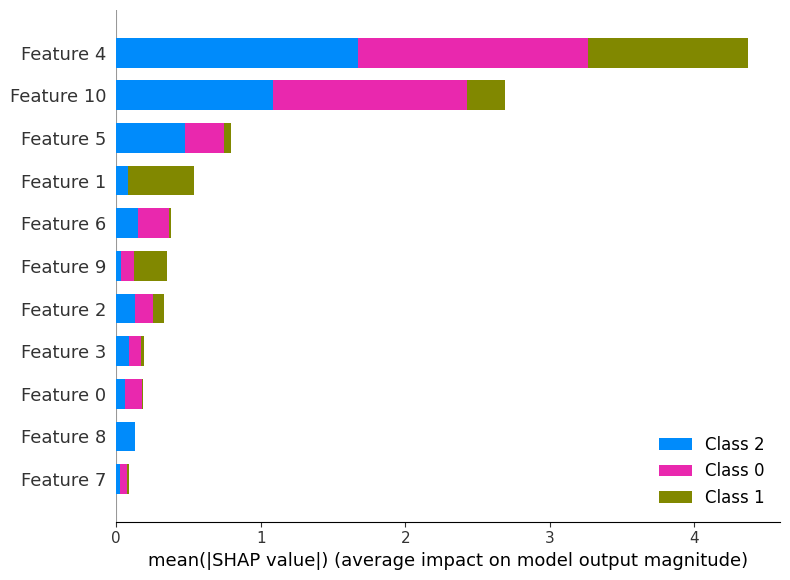

In [162]:
explainer = shap.TreeExplainer(XGBClassifier_model_fitted)
shap_values = explainer.shap_values(test_set)
shap.summary_plot(shap_values, test_set)